In [1]:
import torch

In [2]:
x=torch.empty(3,5)

In [3]:
x

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [4]:
torch.rand(3,4)

tensor([[0.5706, 0.3614, 0.4789, 0.5964],
        [0.9036, 0.5762, 0.5403, 0.2881],
        [0.7794, 0.8979, 0.5523, 0.6708]])

In [5]:
x[1:]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [6]:
x = torch.randn(4, 4)
y = x.view(16)

In [7]:
y

tensor([-0.9138, -0.8700,  0.4397,  1.0190, -0.3213,  0.7709, -0.9579, -2.4247,
         0.1479, -0.1260,  0.4483,  0.1116, -0.5161, -0.6859, -1.4321, -0.8613])

In [8]:
x=torch.ones(2,2,requires_grad=True)

In [9]:
y=x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)

In [10]:
print(y.grad_fn)

In [11]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [12]:
out.backward()

In [13]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [14]:
a=torch.ones(1,1,requires_grad=True)


In [15]:
a

tensor([[1.]], requires_grad=True)

In [16]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self,x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [18]:
net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [19]:
params=list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [20]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0418, -0.0729, -0.1353,  0.0816, -0.0309, -0.0207,  0.1155,  0.1503,
          0.1139, -0.0644]], grad_fn=<ThAddmmBackward>)


In [21]:
#nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.

In [22]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7509, grad_fn=<MseLossBackward>)


In [23]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [24]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0256, -0.0125, -0.0052,  0.0067,  0.0367, -0.0046])


In [25]:
learning_rate=0.01
for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)

In [26]:
import torch.optim as optim
optimizer=optim.SGD(net.parameters(),lr=0.01)
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() 



In [29]:
import torchvision
import torchvision.transforms as transforms

In [31]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [33]:
import matplotlib.pyplot as plt
import numpy as np


In [46]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    z=np.transpose(npimg, (1, 2, 0))
    

(3, 36, 138)


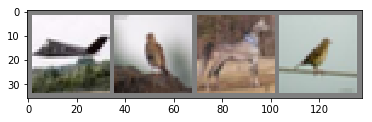

In [48]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels


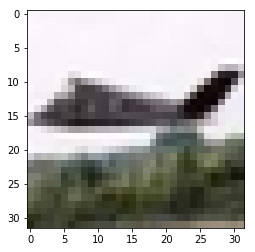

In [57]:
q=images[0].numpy()
q=q/2  + 0.5
plt.imshow(np.transpose(q, (1, 2, 0)))

In [61]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [73]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        optimizer.zero_grad()
        outputs=net(inputs)
        #print(outputs.size())
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
        

[1,  2000] loss: 1.843
[1,  4000] loss: 1.652
[1,  6000] loss: 1.553
[1,  8000] loss: 1.487
[1, 10000] loss: 1.421
[1, 12000] loss: 1.395
[2,  2000] loss: 1.336
[2,  4000] loss: 1.315
[2,  6000] loss: 1.266
[2,  8000] loss: 1.282
[2, 10000] loss: 1.234
[2, 12000] loss: 1.221
Finished Training


(3, 36, 138)
GroundTruth:    cat  ship  ship plane


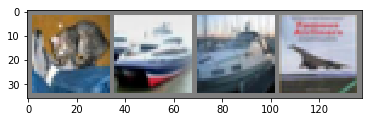

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x000001E701641048>>
Traceback (most recent call last):
  File "C:\Users\hp\PyMOL\envs\py365\lib\site-packages\torch\utils\data\dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "C:\Users\hp\PyMOL\envs\py365\lib\site-packages\torch\utils\data\dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "C:\Users\hp\PyMOL\envs\py365\lib\multiprocessing\queues.py", line 337, in get
    return _ForkingPickler.loads(res)
_pickle.UnpicklingError: could not find MARK


In [74]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [78]:
outputs = net(images)


In [79]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %
